Nama : Adinda Rizka Hamdasati

NIM : 24060122140139

Lab C1 ML - Modul 6

Tugas Modul 6: Principal Component Analysis

Dataset setelah pembersihan:
  manufact    model   sales  resale type  price  engine_s  horsepow  wheelbas  \
0    Acura  Integra  16.919   16.36    0  21.50       1.8       140     101.2   
1    Acura       TL  39.384  19.875    0  28.40       3.2       225     108.1   
3    Acura       RL   8.588  29.725    0  42.00       3.5       210     114.6   
4     Audi       A4  20.397  22.255    0  23.99       1.8       150     102.6   
5     Audi       A6   18.78  23.555    0  33.95       2.8       200     108.7   

   width  length  curb_wgt  fuel_cap   mpg lnsales  partition  
0   67.3   172.4     2.639      13.2  28.0   2.828          0  
1   70.3   192.9     3.517      17.2  25.0   3.673          0  
3   71.4   196.6     3.850      18.0  22.0    2.15          0  
4   68.2   178.0     2.998      16.4  27.0   3.015          0  
5   76.1   192.0     3.561      18.5  22.0   2.933          0  
Rasio varians yang dijelaskan: [0.63956616 0.16785005]
Total varians yang dijelaskan: 80.74%


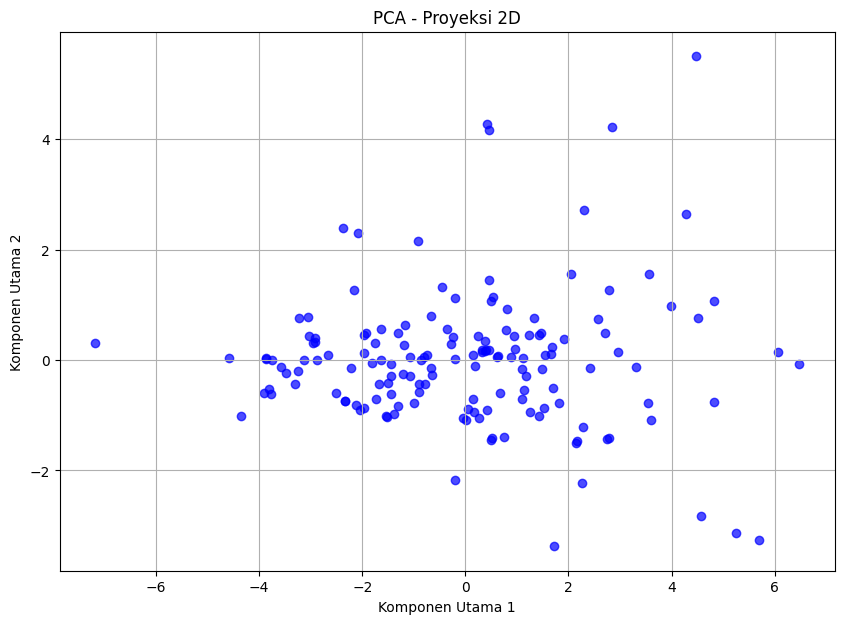

In [5]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
url = "cars_clus.csv"  # Path ke file dataset
data = pd.read_csv(url)

# Membersihkan data
numeric_columns = ['price', 'engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']
data.replace('$null$', pd.NA, inplace=True)  # Mengganti nilai $null$ dengan NaN
data.dropna(subset=numeric_columns, inplace=True)  # Menghapus baris dengan nilai kosong

# Konversi kolom numerik ke tipe data float
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

print("Dataset setelah pembersihan:")
print(data.head())

# Pemilihan fitur
X = data[numeric_columns]

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implementasi PCA
pca = PCA(n_components=2)  # Mengurangi dimensi menjadi 2 komponen utama
X_pca = pca.fit_transform(X_scaled)

# Varians yang dijelaskan oleh komponen utama
explained_variance = pca.explained_variance_ratio_
print(f"Rasio varians yang dijelaskan: {explained_variance}")
print(f"Total varians yang dijelaskan: {sum(explained_variance) * 100:.2f}%")

# Visualisasi hasil PCA dalam 2 dimensi
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, c='blue')
plt.title("PCA - Proyeksi 2D")
plt.xlabel("Komponen Utama 1")
plt.ylabel("Komponen Utama 2")
plt.grid()
plt.show()

Penjelasan :

Kode ini melakukan analisis Principal Component Analysis (PCA) pada dataset cars_clus.csv. Langkah pertama adalah membaca dataset, membersihkan data dengan mengganti nilai $null$ menjadi NaN, dan menghapus baris yang memiliki nilai kosong. Kolom numerik yang relevan, seperti price, engine_s, horsepow, dan lainnya, dipilih dan dikonversi ke tipe data float untuk memastikan kompatibilitas.

Setelah data siap, dilakukan normalisasi menggunakan StandardScaler untuk menyamakan skala antar fitur. Selanjutnya, PCA diterapkan untuk mereduksi dimensi data menjadi dua komponen utama, sehingga data lebih sederhana tanpa kehilangan informasi signifikan. Varians yang dijelaskan oleh dua komponen utama dihitung untuk memastikan sebagian besar informasi dari data asli tetap terjaga.

Hasil PCA divisualisasikan dalam bentuk scatter plot, dengan sumbu X sebagai “Komponen Utama 1” dan sumbu Y sebagai “Komponen Utama 2”. Plot ini memudahkan pengamatan pola distribusi data dalam dua dimensi. Analisis ini berguna untuk menyederhanakan data berdimensi tinggi dan mempersiapkannya untuk langkah analisis lebih lanjut.